<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/kmeans_olap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from sklearn.cluster import KMeans
import pandas as pd


In [55]:
df = pd.read_csv('melb_data1.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,Nelson,3/9/2016,13.5,3042,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,hockingstuart,3/9/2016,3.3,3206,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,Thomson,3/9/2016,3.3,3206,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,Brace,3/9/2016,6.4,3078,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,Jellis,3/9/2016,6.4,3078,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [57]:
df_new = df[["Price"]]
# Xóa các dòng có giá trị thiếu trong dataset (nếu cần thiết)
df_new = df_new.dropna()
print(len(df_new))
df_new.head()

13580


,Price
0,840000
1,1275000
2,1455000
3,2000000
4,1110000


In [58]:
import numpy as np
from sklearn.datasets import make_blobs

class KMeans():
  def __init__(self, k, max_iteration=10):
      self.k = k
      self.max_iteration = max_iteration
      self.all_centroids = []
      self.all_labels = []

  # Hàm thuật toán k-Means lấy đầu vào là một bộ dữ liệu và số lượng cluster k. Trẻ về tâm của k cụm
  def fit(self, dataSet):
      # Khởi tạo ngẫu nhiên k centroids
      numFeatures = dataSet.shape[1]
      centroids = self.get_random_centroids(numFeatures, self.k)
      self.all_centroids.append(centroids)
      self.all_labels.append(None)

      # Khởi tạo các biến iterations, oldCentroids
      iterations = 0
      oldCentroids = None
      
      # Vòng lặp cập nhật centroids trong thuật toán k-Means
      while not self.should_stop(oldCentroids, centroids, iterations):
          # Lưu lại centroids cũ cho quá trình kiểm tra hội tụ
          oldCentroids = centroids
          iterations += 1
          
          # Gán nhãn cho mỗi diểm dữ liệu dựa vào centroids
          labels = self.get_labels(dataSet, centroids)
          self.all_labels.append(labels)

          # Cập nhật centroids dựa vào nhãn dữ liệu
          # print('0ld centroids: ', centroids)
          centroids = self.get_centroids(dataSet, labels, self.k)
          # print('new centroids: ', centroids)
          self.all_centroids.append(centroids)
  
      return centroids

  # Hàm khởi tạo centroids ngẫu nhiên
  def get_random_centroids(self, numFeatures, k):
    return np.random.rand(k, numFeatures)
    # return np.array([[-5., -5.],
    #                  [4., 6.]])

  # Hàm này trả về nhãn cho mỗi điểm dữ liệu trong datasets
  def get_labels(self, dataSet, centroids):
      # Với mỗi quan sát trong dataset, lựa chọn centroids gần nhất để gán label cho dữ liệu.
      labels = []
      for x in dataSet:
        # Tính khoảng cách tới các centroids và cập nhận nhãn
        distances = np.sum((x-centroids)**2, axis=1)
        label = np.argmin(distances)
        labels.append(label)
      return labels
      
  # Hàm này trả về True hoặc False nếu k-Means hoàn thành. Điều kiện k-Means hoàn thành là 
  # thuật toán vượt ngưỡng số lượng vòng lặp hoặc centroids ngừng thay đổi
  def should_stop(self, oldCentroids, centroids, iterations):
      if iterations > self.max_iteration: 
        return True
      return np.all(oldCentroids == centroids)

  # Trả về toan độ mới cho k centroids của mỗi chiều.
  def get_centroids(self, dataSet, labels, k):
      centroids = []
      for j in np.arange(k):
        # Lấy index cho mỗi centroids
        idx_j = np.where(np.array(labels) == j)[0]
        centroid_j = dataSet[idx_j, :].mean(axis=0)
        centroids.append(centroid_j)
      return np.array(centroids)

In [66]:
df_new, _ = make_blobs(n_samples=13580, cluster_std=3.0, random_state=4527)

kmean = KMeans(k=3, max_iteration=4)
centroids = kmean.fit(df_new)

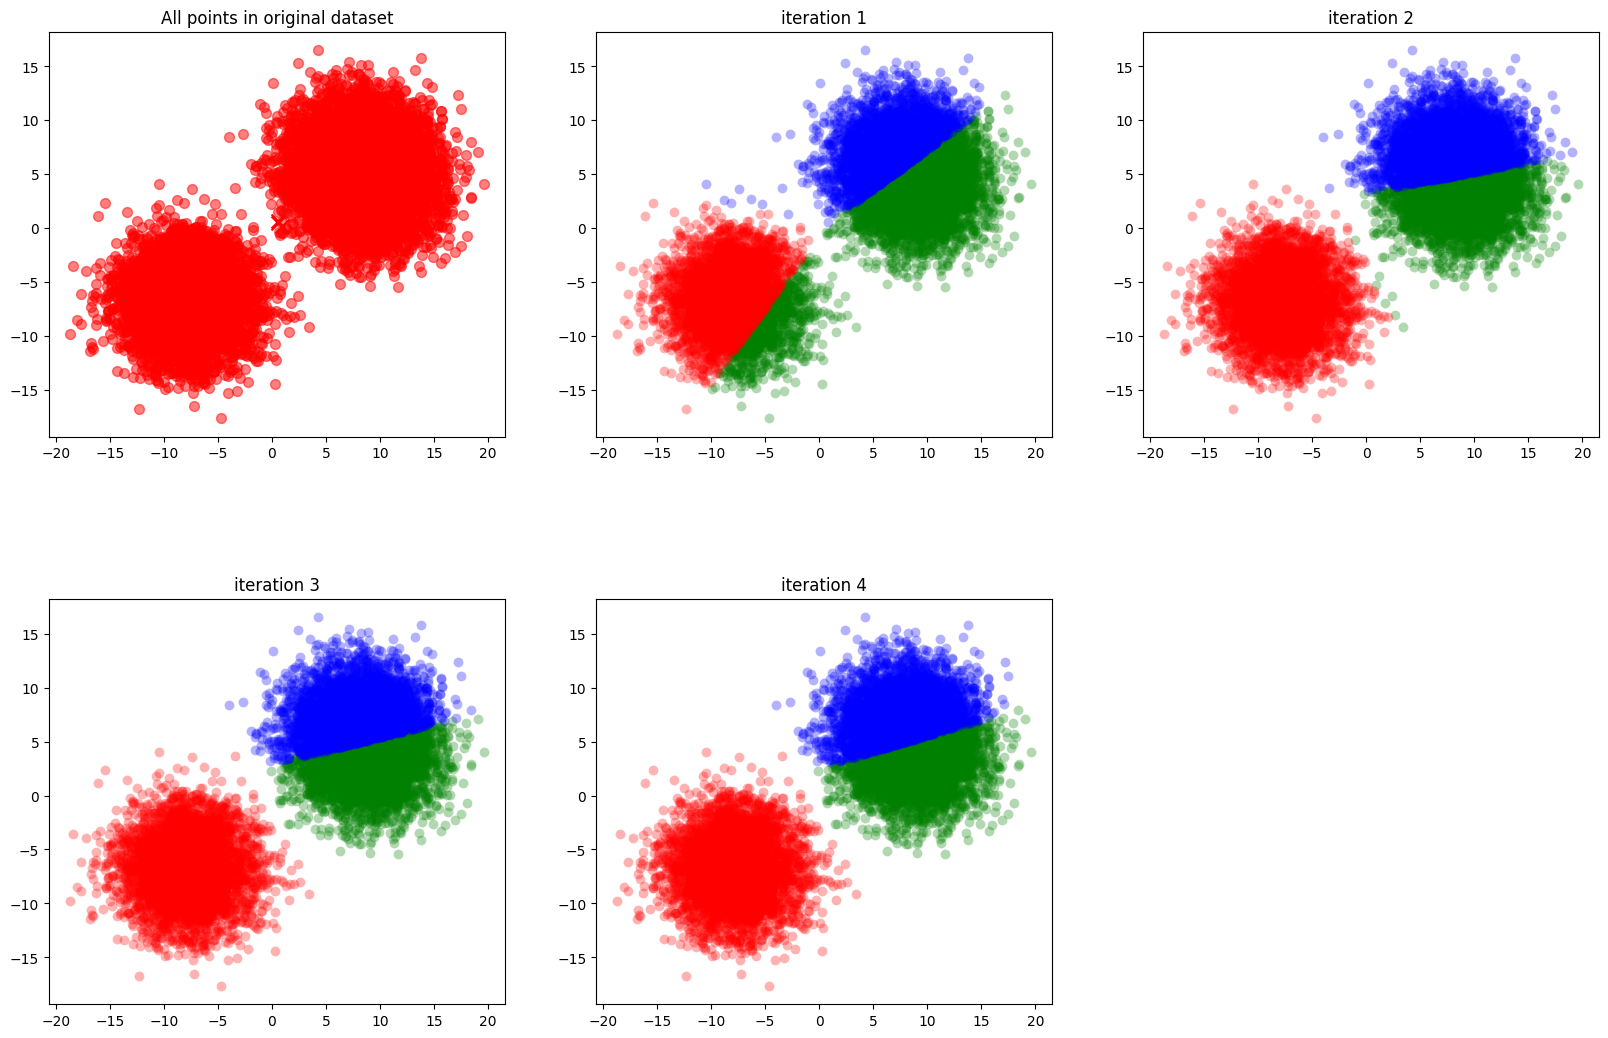

In [76]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(nrows=3, ncols=3)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
colors = ['green', 'blue', 'red']
labels = ['cluster 1', 'cluster 2', 'cluster3']

for i in np.arange(len(kmean.all_centroids)):
  ax = plt.subplot(gs[i])
  if i == 0:
    centroids_i = kmean.all_centroids[i]
    plt.scatter(df_new[:, 0], df_new[:, 1], s=50, alpha=0.5, color='red')
    for j in np.arange(kmean.k):
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', s=100, color='red')
    plt.title('All points in original dataset')
  else:
    # Lấy centroids và labels tại bước thứ i
    centroids_i = kmean.all_centroids[i]
    labels_i = kmean.all_labels[i]
    # Visualize các điểm cho từng cụm
    for j in np.arange(kmean.k):
      idx_j = np.where(np.array(labels_i) == j)[0]
      plt.scatter(df_new[idx_j, 0], df_new[idx_j, 1], color=colors[j], label=labels[j], s=50, alpha=0.3, lw = 0)
      plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', color=colors[j], s=100, label=labels[j])
    plt.title(r'iteration {}'.format(i))
    if i==4:
      break

In [47]:
df_new2 = df[["Price", "Regionname"]]
# Xóa các dòng có giá trị thiếu trong dataset (nếu cần thiết)
df_new2 = df_new2.dropna()
df_new3 = df_new2[df_new2["Regionname"].isin(["Southern Metropolitan", "Western Metropolitan"])]
df_new3 = df_new3.reset_index(drop=True)
print(len(df_new3))
print(df_new3)

7643
        Price             Regionname
0      840000   Western Metropolitan
1     1275000  Southern Metropolitan
2     1455000  Southern Metropolitan
3      520000   Western Metropolitan
4     1085000   Western Metropolitan
...       ...                    ...
7638  1030000   Western Metropolitan
7639   878000   Western Metropolitan
7640   460000   Western Metropolitan
7641   190000   Western Metropolitan
7642   665000  Southern Metropolitan

[7643 rows x 2 columns]


In [49]:
!pip install -U scikit-learn
from sklearn.cluster import KMeans
import numpy as np


# Xây dựng ma trận dữ liệu
X = []
for index, data in df_new3.iterrows():
    price = data["Price"]
    regionname = 1 if data["Regionname"] == "Southern Metropolitan" else 0
    X.append([price, regionname])

# Chuyển đổi X thành một mảng numpy
X = np.array(X)

# Áp dụng thuật toán K-means với số lượng cụm là 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Lấy các trung tâm cụm và nhãn của từng điểm dữ liệu
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

for i, data in df_new3.iterrows():
    price = data["Price"]
    regionname = "Southern Metropolitan" if labels[i] == 1 else "Western Metropolitan"
    cluster_center = cluster_centers[labels[i]]
    print(f"Price: {price}, Regionname: {regionname}, Cluster Center: {cluster_center}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Price: 1205000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 1240000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 922000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 1567000, Regionname: Southern Metropolitan, Cluster Center: [2.21591411e+06 9.10704382e-01]
Price: 980000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 1370000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 1495000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 1103000, Regionname: Western Metropolitan, Cluster Center: [8.57016709e+05 5.22773973e-01]
Price: 1631000, Regionname: Southern Metropolitan, Cluster Center: [2.21591411e+06 9.10704382e-01]
Price: 1845000, Regionname: Southern Metropolitan, Cluster Center: 

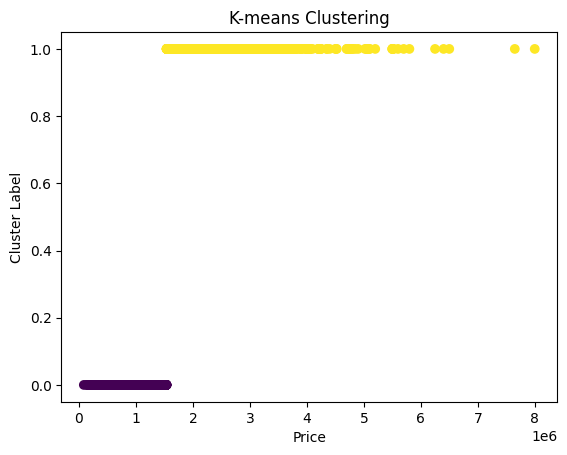

In [51]:
import matplotlib.pyplot as plt

dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)

kmean = KMeans(k=2, max_iteration=8)
centroids = kmean.fit(dataset)


# Biểu đồ scatter plot cho kết quả K-means
plt.scatter(df_new3["Price"], labels, c=labels)
plt.xlabel('Price')
plt.ylabel('Cluster Label')
plt.title('K-means Clustering')
plt.show()